# Загрузка Pandas и очистка данных

In [562]:
import pandas as pd
import json  
from pprint import pprint  
import re
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind


In [563]:
df = pd.read_csv('/Volumes/Samsung_T5/Обучение/skillfactory/data/main_task.csv')

In [564]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [565]:
df.isna().sum()

Restaurant_id            0
City                     0
Cuisine Style         9283
Ranking                  0
Rating                   0
Price Range          13886
Number of Reviews     2543
Reviews                  0
URL_TA                   0
ID_TA                    0
dtype: int64

In [566]:
df.columns

Index(['Restaurant_id', 'City', 'Cuisine Style', 'Ranking', 'Rating',
       'Price Range', 'Number of Reviews', 'Reviews', 'URL_TA', 'ID_TA'],
      dtype='object')

* Restaurant_id — идентификационный номер ресторана / сети ресторанов, нет пустых значений, строковый тип
* City — город, в котором находится ресторан, нет пустых значений, строковый тип
* Cuisine Style — кухня или кухни, к которым можно отнести блюда, предлагаемые в ресторане, 
четверь значений пустые, сборный тип, можно разбить на много колонок
* Ranking — место, которое занимает данный ресторан среди всех ресторанов своего города, 
нет пропущенных значений, число
* Rating — рейтинг ресторана по данным TripAdvisor (именно это значение должна будет предсказывать модель), 
нет пропущенных значений, число
* Price Range — диапазон цен в ресторане, более половины пустых значений
* Number of Reviews — количество отзывов о ресторане, есть пустые значения но не много, число
* Reviews — данные о двух отзывах, которые отображаются на сайте ресторанаё
два строковых отзыва о ресторане
* URL_TA — URL страницы ресторана на TripAdvosor;
* ID_TA — идентификатор ресторана в базе данных TripAdvisor.

In [567]:
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

## City

Города все непустые, всего представлен 31 город

In [568]:
df.City.describe()

count      40000
unique        31
top       London
freq        5757
Name: City, dtype: object

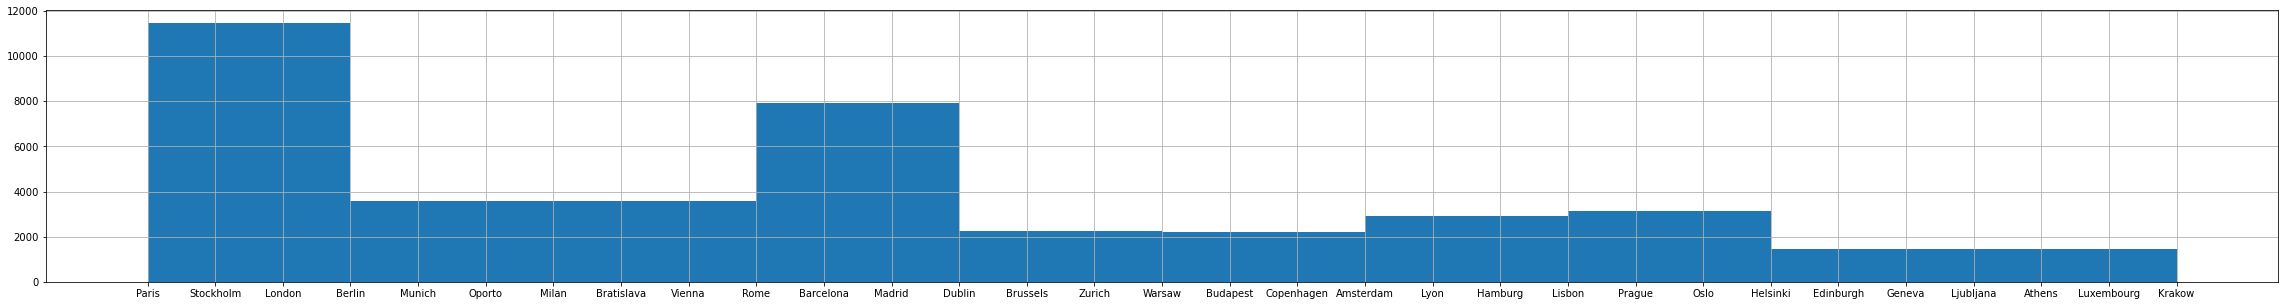

In [569]:
fig, axs = plt.subplots(figsize=(40,5))
n_bins = df.City.value_counts()
df.City.hist()

(города можно разделить на 3 категории)

## Ranking

In [570]:
df.Ranking.describe()

count    40000.000000
mean      3676.028525
std       3708.749567
min          1.000000
25%        973.000000
50%       2285.000000
75%       5260.000000
max      16444.000000
Name: Ranking, dtype: float64

пропусков нет

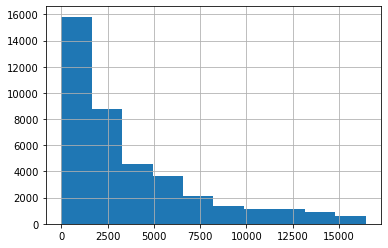

In [571]:
df.Ranking.hist()

экспоненциальное распределение

## Price Range

In [572]:
df['Price Range'].describe()

count        26114
unique           3
top       $$ - $$$
freq         18412
Name: Price Range, dtype: object

Колонка с уровнем цен имеет 13886 пропусков.
Используются три градации уровня цен:

In [573]:
df['Price Range'].value_counts()

$$ - $$$    18412
$            6279
$$$$         1423
Name: Price Range, dtype: int64

перезаполню уровень цен по следующему алгоритму:
* уровень цен не найден - подставлю значение 'other'
* уровень цен "дешего" - подставлю 1
* уровень цен "средне" - подставлю 2
* уровень цен "дорого" - подставлю 3

In [574]:
def find_new_price_range(line):
    if pd.isnull(line):
        return 'other'
    else:
        if line == "$":
            return 'cheap'
        
        if line == '$$ - $$$':
            return 'middle'
        
        if line == '$$$$':
            return 'expensive'
    
    
df['Price Range'] = df['Price Range'].apply(find_new_price_range)



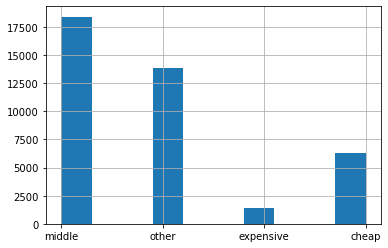

In [575]:
df['Price Range'].hist()

In [576]:
#далее с помощью метода get_dummies преобразую эту колонку в несколько столбцов

df = pd.get_dummies(df, columns=['Price Range'])
df.head()

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Number of Reviews,Reviews,URL_TA,ID_TA,Price Range_cheap,Price Range_expensive,Price Range_middle,Price Range_other
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,0,0,1,0
1,id_1535,Stockholm,NaN,1537.0,4.0,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,0,0,0,1
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,0,1,0,0
3,id_3456,Berlin,NaN,3458.0,5.0,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776,0,0,0,1
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963,0,0,1,0


## Number of Reviews 

Колонка Number of Reviews имеет 2543 пропусков.
Заполню их нулями

In [577]:
def fill_Number_of_Reviews(line):
    if pd.isnull(line):
        return 0
    else:
        return line

df['Number of Reviews'] = df['Number of Reviews'].apply(fill_Number_of_Reviews)

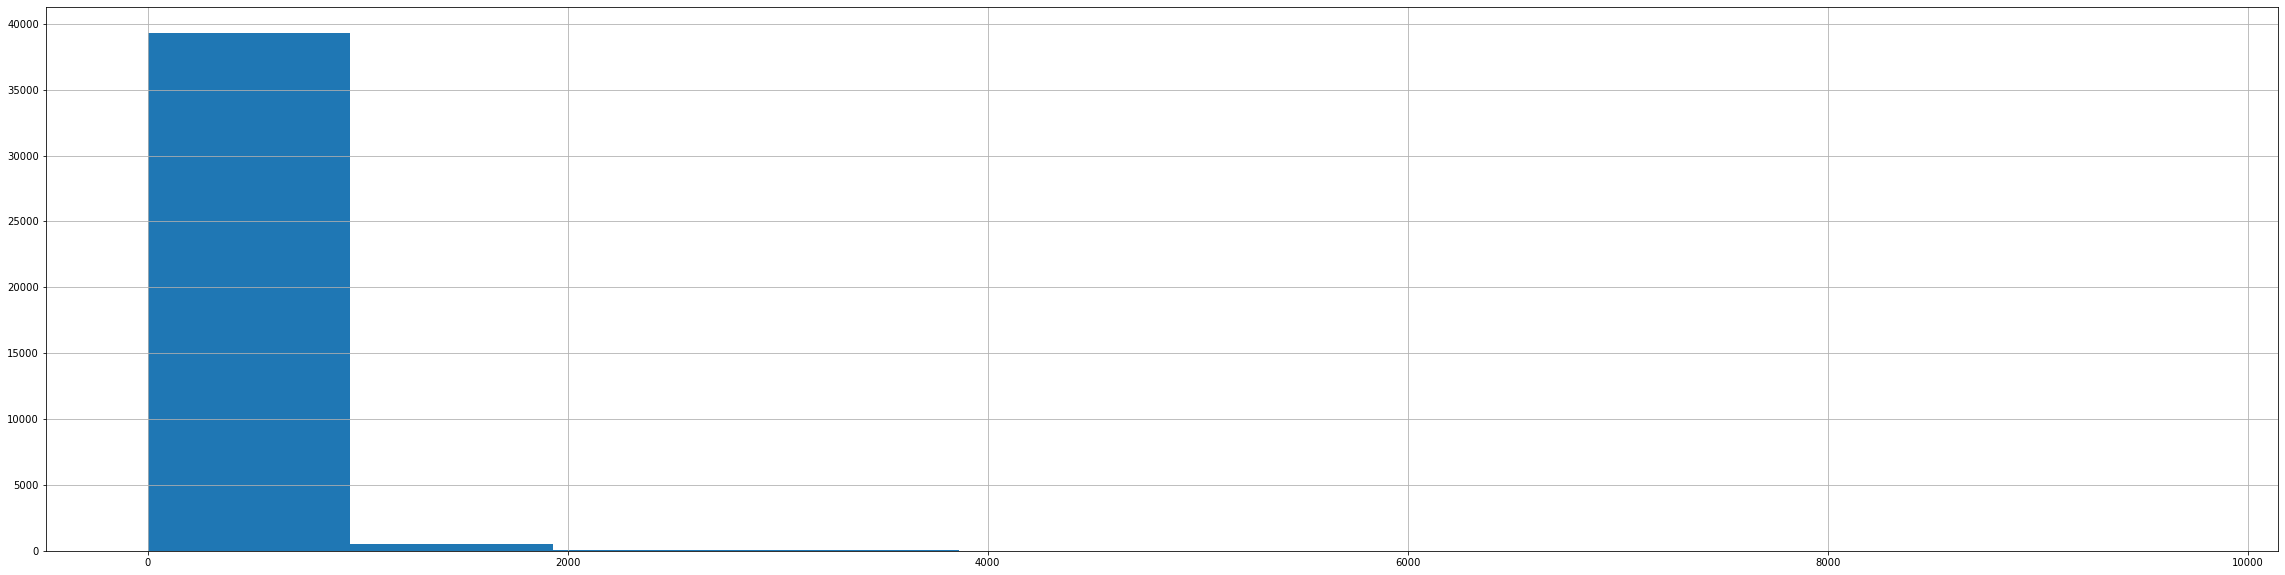

In [578]:
fig, axs = plt.subplots(figsize=(40,10))
df['Number of Reviews'].hist()

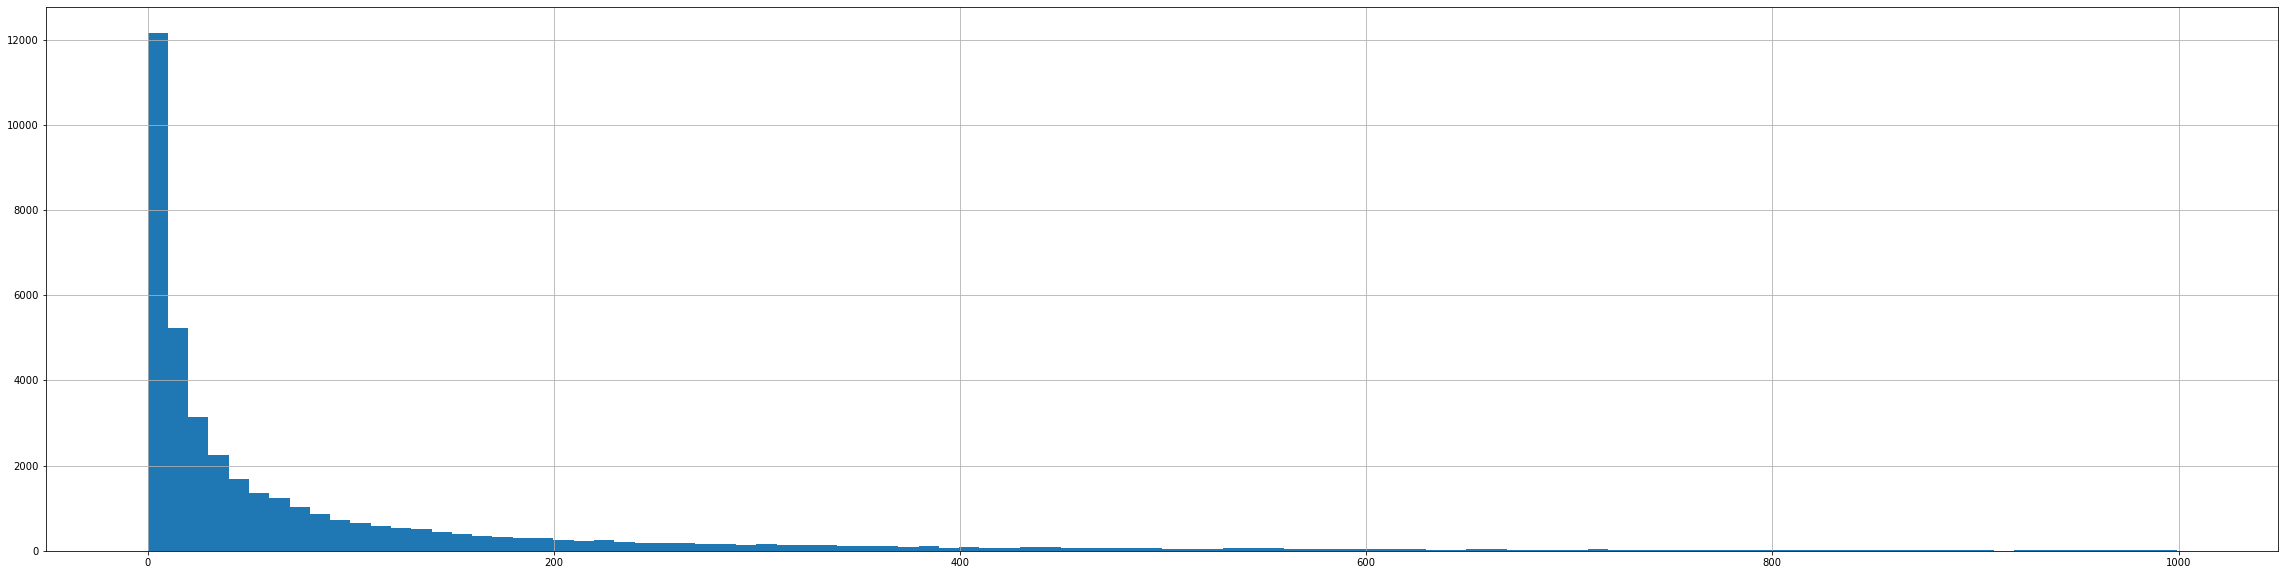

In [579]:
fig, axs = plt.subplots(figsize=(40,10))
df['Number of Reviews'][df['Number of Reviews']<1000].hist(bins = 100)

экспоненциальное распредедение

## Преобразование колонки "виды кухни"

Поле Cuisine Style имеет 9283 пропусков.  
Добавлю новую колонку, в которой запишу, сколько кухонь представдено в каждом ресторане.
Если данные о кухнях отсутствуют, буду считать, что в ресторане представлена одна кухня.

In [580]:
def find_Count_Cuisine(Cuisine_list):
    if pd.isnull(Cuisine_list):
        return 1
    else:
        l = Cuisine_list.split(',')
        return len(l)
    

df['Count_Cuisine'] = df['Cuisine Style'].apply(find_Count_Cuisine)
df[['Count_Cuisine','Cuisine Style']] 

,Count_Cuisine,Cuisine Style
0,3,"['European', 'French', 'International']"
1,1,NaN
2,7,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget..."
3,1,NaN
4,3,"['German', 'Central European', 'Vegetarian Fri..."
...,...,...
39995,4,"['Italian', 'Vegetarian Friendly', 'Vegan Opti..."
39996,5,"['French', 'American', 'Bar', 'European', 'Veg..."
39997,2,"['Japanese', 'Sushi']"
39998,5,"['Polish', 'European', 'Eastern European', 'Ce..."


In [581]:
df['Count_Cuisine'].describe()

count    40000.000000
mean         2.622400
std          1.817292
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max         21.000000
Name: Count_Cuisine, dtype: float64

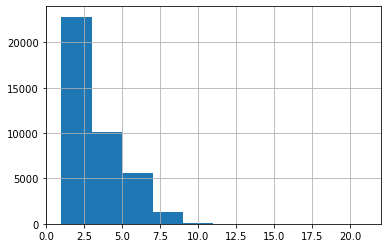

In [582]:
df['Count_Cuisine'].hist()

Теперь посмотрим на самые распространенные кухни.

In [583]:
CuisineDict = {}
data = df['Cuisine Style'][df['Cuisine Style'].isna() == False]

summ = 0
for  ss in data:
    for line in ss.split(','):
        mm = str(re.findall('\'([a-zA-Z1-9\s]+)\'', line))    
        summ = summ + 1
        if CuisineDict.setdefault(mm,1): CuisineDict[mm] += 1
        
#print(CuisineDict)
print("Всего представлено кухонь " + str(len(CuisineDict)))
print("Топ 6 кухонь: ")

sorted(CuisineDict, key=lambda x: CuisineDict.get(x), reverse=True)[0:6]

Всего представлено кухонь 125
Топ 6 кухонь: 


["['Vegetarian Friendly']",
 "['European']",
 "['Mediterranean']",
 "['Italian']",
 "['Vegan Options']",
 "['Gluten Free Options']"]

Преобразую 6 самых популярных кухонь в колонки согласно концепции dummy variables

In [584]:
list_c = ['Vegetarian Friendly','European', 'Mediterranean','Italian','Vegan Options','Gluten Free Options']
#list_c = sorted(CuisineDict, key=lambda x: CuisineDict.get(x), reverse=True)[0:6]

def FillTypeCuisine(line, *args):
    if pd.isnull(line):
        return 0
    else:
            if args[0] in line:
                return 1
            else: return 0

    
for i in list_c:
    df[i] = df['Cuisine Style'].apply(FillTypeCuisine, args=[i])

    
    
df.head()

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Number of Reviews,Reviews,URL_TA,ID_TA,Price Range_cheap,Price Range_expensive,Price Range_middle,Price Range_other,Count_Cuisine,Vegetarian Friendly,European,Mediterranean,Italian,Vegan Options,Gluten Free Options
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,0,0,1,0,3,0,1,0,0,0,0
1,id_1535,Stockholm,NaN,1537.0,4.0,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,0,0,0,1,1,0,0,0,0,0,0
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,0,1,0,0,7,1,0,0,0,1,1
3,id_3456,Berlin,NaN,3458.0,5.0,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776,0,0,0,1,1,0,0,0,0,0,0
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963,0,0,1,0,3,1,1,0,0,0,0


In [585]:
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

## Reviews

Добавляю колонку 'Good words', в которую запишу частоту встречаемости "хороших" слов в отзывах 

In [586]:
import re
mas_words = ['[G,g]reat','[G,g]ood','[B,b]est','[F,f]riendly','[U,u]nique']

def CountWords(Reviews_list):
    goodwords = 0
    for line in mas_words:
        goodwords_list = re.findall(line, Reviews_list)
        goodwords = goodwords + len(goodwords_list)    
    return goodwords


df['GoodWords'] = df['Reviews'].apply(CountWords)
df[['GoodWords','Reviews']].head() 

,GoodWords,Reviews
0,2,"[['Good food at your doorstep', 'A good hotel ..."
1,1,"[['Unique cuisine', 'Delicious Nepalese food']..."
2,0,"[['Catch up with friends', 'Not exceptional'],..."
3,0,"[[], []]"
4,1,"[['Best place to try a Bavarian food', 'Nice b..."


In [587]:
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

Добавлю в датасет еще две колонки:
    * min_Review_date - количество дней, которое прошло с написания последнего отзыва
    * DayLag - веменной лаг между последними ревью

In [588]:
from datetime import datetime

# функция ищет количество дней, которое прошло с даты самого свежего отзыва о ресторане
def find_min_dates(text):
    regex = '\d\d/\d\d/\d{4}'
    result_dates = re.findall(regex, text)
    
    mas_dates = []
    now_date = datetime.now()
    for date_x in result_dates:
        curr_date = datetime.strptime(date_x, "%m/%d/%Y")
        lag = now_date - curr_date   
        mas_dates.append(int(lag.days))  
    if len(mas_dates)> 0: res = min(mas_dates)
    else: res = 10000000000
    #print(min(mas_dates))
    return res

# функция находит временной лаг между отзывами
def find_DayLag(text):
    regex = '\d\d/\d\d/\d{4}'
    result_dates = re.findall(regex, text)
    
    mas_dates = []
    now_date = datetime.now()
    for date_x in result_dates:
        curr_date = datetime.strptime(date_x, "%m/%d/%Y")
        lag = now_date - curr_date   
        mas_dates.append(int(lag.days))  
    if len(mas_dates)> 0: res = max(mas_dates) - min(mas_dates)
    else: res = 0
    #print(min(mas_dates))
    return res
    

df['min_Review_date'] = df['Reviews'].apply(find_min_dates)
print(df['min_Review_date'].min())
df['DayLag'] = df['Reviews'].apply(find_DayLag)
df['DayLag'].max()

929


3207

In [589]:
df.head()

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Number of Reviews,Reviews,URL_TA,ID_TA,Price Range_cheap,...,Count_Cuisine,Vegetarian Friendly,European,Mediterranean,Italian,Vegan Options,Gluten Free Options,GoodWords,min_Review_date,DayLag
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,0,...,3,0,1,0,0,0,0,2,986,41
1,id_1535,Stockholm,NaN,1537.0,4.0,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,0,...,1,0,0,0,0,0,0,1,1164,382
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,0,...,7,1,0,0,0,1,1,0,978,2
3,id_3456,Berlin,NaN,3458.0,5.0,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776,0,...,1,0,0,0,0,0,0,0,10000000000,0
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963,0,...,3,1,1,0,0,0,0,1,1029,272


## Дополнительные данные о городах

Загружу файл, который содержит данные о городах. Хочу определить, какие из представленных городов являются столицами, а также население этих городов.

В представленном ниже файле меня будут интересовать поля:
    * страна
    * население
    * тип города (столица, адм центр и т.д.)

In [590]:
df_cities = pd.read_csv('/Users/tatianafrolova/worldcities.csv', sep = ';')

In [591]:
df_cities.head()

,city,city_ascii,lat,lng,country,iso2,iso3,capital,population,id
0,Tokyo,Tokyo,35.6850,139.7514,Japan,JP,JPN,primary,35676000.0,1392685764
1,New York,New York,40.6943,-73.9249,United States,US,USA,NaN,19354922.0,1840034016
2,Mexico City,Mexico City,19.4424,-99.1310,Mexico,MX,MEX,primary,19028000.0,1484247881
3,Mumbai,Mumbai,19.0170,72.8570,India,IN,IND,admin,18978000.0,1356226629
4,São Paulo,Sao Paulo,-23.5587,-46.6250,Brazil,BR,BRA,admin,18845000.0,1076532519


В данных присутствуют города всего мира и, например, Парижей там 5 штук. Хочу отобрать только европейские города. Для этого загружу еще один файл со странами и континентами.


In [592]:
df_countries = pd.read_csv('/Users/tatianafrolova/countriescontinents4.csv', sep = ';')

In [593]:
df_countries.head()

,name,code,continent
0,Afghanistan,AF,Asia
1,Albania,AL,Europe
2,Algeria,DZ,Africa
3,American Samoa,AS,Oceania
4,Andorra,AD,Europe


In [594]:
df_cities = df_cities.merge(df_countries, how = 'left', left_on='iso2', right_on='code')

In [595]:
df_cities = df_cities[df_cities['continent'] == 'Europe'][['city_ascii','country','capital','population']]
df_cities.head()

,city_ascii,country,capital,population
17,Moscow,Russia,primary,10452000.0
19,Paris,France,primary,9904000.0
25,London,United Kingdom,primary,8567000.0
46,Madrid,Spain,primary,5567000.0
56,Barcelona,Spain,admin,4920000.0


In [596]:
df = df.merge(df_cities, how = 'left', left_on='City', right_on='city_ascii')
df.head()

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Number of Reviews,Reviews,URL_TA,ID_TA,Price Range_cheap,...,Italian,Vegan Options,Gluten Free Options,GoodWords,min_Review_date,DayLag,city_ascii,country,capital,population
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,0,...,0,0,0,2,986,41,Paris,France,primary,9904000.0
1,id_1535,Stockholm,NaN,1537.0,4.0,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,0,...,0,0,0,1,1164,382,Stockholm,Sweden,primary,1264000.0
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,0,...,0,1,1,0,978,2,London,United Kingdom,primary,8567000.0
3,id_3456,Berlin,NaN,3458.0,5.0,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776,0,...,0,0,0,0,10000000000,0,Berlin,Germany,primary,3406000.0
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963,0,...,0,0,0,1,1029,272,Munich,Germany,admin,1275000.0


In [597]:
df['capital'].value_counts()

primary    29828
admin      10172
Name: capital, dtype: int64

In [598]:
df[df['capital'].isnull()]

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Number of Reviews,Reviews,URL_TA,ID_TA,Price Range_cheap,...,Italian,Vegan Options,Gluten Free Options,GoodWords,min_Review_date,DayLag,city_ascii,country,capital,population


все города являются столицами либо административными центрами и все заполнены

топ 6 стран:

Преобразую колонку capital:
* 1, если город primary
* 0, если город admin

In [599]:
def is_capital(line):
    if line == 'primary': return 1
    else: return 0
    
df['capital'] = df['capital'].apply(is_capital)
df.head()

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Number of Reviews,Reviews,URL_TA,ID_TA,Price Range_cheap,...,Italian,Vegan Options,Gluten Free Options,GoodWords,min_Review_date,DayLag,city_ascii,country,capital,population
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,0,...,0,0,0,2,986,41,Paris,France,1,9904000.0
1,id_1535,Stockholm,NaN,1537.0,4.0,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,0,...,0,0,0,1,1164,382,Stockholm,Sweden,1,1264000.0
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,0,...,0,1,1,0,978,2,London,United Kingdom,1,8567000.0
3,id_3456,Berlin,NaN,3458.0,5.0,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776,0,...,0,0,0,0,10000000000,0,Berlin,Germany,1,3406000.0
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963,0,...,0,0,0,1,1029,272,Munich,Germany,0,1275000.0


In [600]:
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [601]:
df['country'].value_counts(normalize=True)[0:6]

United Kingdom    0.158825
Spain             0.146050
France            0.144725
Italy             0.105275
Germany           0.099925
Portugal          0.045325
Name: country, dtype: float64

Добавлю колонку с самыми популярными странами

In [602]:
list_c = ['United Kingdom','Spain', 'France','Italy','Germany','Portugal']

def fing_country(line):
    if line in list_c: return line
    else: return 'other'

df['h_country'] = df['country'].apply(fing_country)

In [603]:
df = pd.get_dummies(df, columns=['h_country'])
df.head()

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Number of Reviews,Reviews,URL_TA,ID_TA,Price Range_cheap,...,country,capital,population,h_country_France,h_country_Germany,h_country_Italy,h_country_Portugal,h_country_Spain,h_country_United Kingdom,h_country_other
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,0,...,France,1,9904000.0,1,0,0,0,0,0,0
1,id_1535,Stockholm,NaN,1537.0,4.0,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,0,...,Sweden,1,1264000.0,0,0,0,0,0,0,1
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,0,...,United Kingdom,1,8567000.0,0,0,0,0,0,1,0
3,id_3456,Berlin,NaN,3458.0,5.0,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776,0,...,Germany,1,3406000.0,0,1,0,0,0,0,0
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963,0,...,Germany,0,1275000.0,0,1,0,0,0,0,0


In [604]:
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

## Дополнительный признак сети

Добавлю колонку net - признак того, что ресторан принадлежит сети

In [605]:
nets_df = df.groupby(['Restaurant_id']).count()['ID_TA']
df = df.merge(nets_df, how = 'left', on='Restaurant_id')

In [606]:
def net_or_not(net_size):
    if net_size == 1:
        return 0
    else: 
        return 1
    

df['net'] = df['ID_TA_y'].apply(net_or_not)
#df[df['net']==0]

In [607]:
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [608]:
df.head()

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Number of Reviews,Reviews,URL_TA,ID_TA_x,Price Range_cheap,...,population,h_country_France,h_country_Germany,h_country_Italy,h_country_Portugal,h_country_Spain,h_country_United Kingdom,h_country_other,ID_TA_y,net
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,0,...,9904000.0,1,0,0,0,0,0,0,3,1
1,id_1535,Stockholm,NaN,1537.0,4.0,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,0,...,1264000.0,0,0,0,0,0,0,1,10,1
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,0,...,8567000.0,0,0,0,0,0,1,0,8,1
3,id_3456,Berlin,NaN,3458.0,5.0,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776,0,...,3406000.0,0,1,0,0,0,0,0,4,1
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963,0,...,1275000.0,0,1,0,0,0,0,0,14,1


## удалю лишние колонки

In [609]:
df.columns

Index(['Restaurant_id', 'City', 'Cuisine Style', 'Ranking', 'Rating',
       'Number of Reviews', 'Reviews', 'URL_TA', 'ID_TA_x',
       'Price Range_cheap', 'Price Range_expensive', 'Price Range_middle',
       'Price Range_other', 'Count_Cuisine', 'Vegetarian Friendly', 'European',
       'Mediterranean', 'Italian', 'Vegan Options', 'Gluten Free Options',
       'GoodWords', 'min_Review_date', 'DayLag', 'city_ascii', 'country',
       'capital', 'population', 'h_country_France', 'h_country_Germany',
       'h_country_Italy', 'h_country_Portugal', 'h_country_Spain',
       'h_country_United Kingdom', 'h_country_other', 'ID_TA_y', 'net'],
      dtype='object')

In [610]:
df.drop(['Restaurant_id', 'City', 'Cuisine Style',
       'Reviews', 'URL_TA', 'ID_TA_x', 'city_ascii',
       'country'], axis=1, inplace=True)

In [611]:
df

,Ranking,Rating,Number of Reviews,Price Range_cheap,Price Range_expensive,Price Range_middle,Price Range_other,Count_Cuisine,Vegetarian Friendly,European,...,population,h_country_France,h_country_Germany,h_country_Italy,h_country_Portugal,h_country_Spain,h_country_United Kingdom,h_country_other,ID_TA_y,net
0,5570.0,3.5,194.0,0,0,1,0,3,0,1,...,9904000.0,1,0,0,0,0,0,0,3,1
1,1537.0,4.0,10.0,0,0,0,1,1,0,0,...,1264000.0,0,0,0,0,0,0,1,10,1
2,353.0,4.5,688.0,0,1,0,0,7,1,0,...,8567000.0,0,0,0,0,0,1,0,8,1
3,3458.0,5.0,3.0,0,0,0,1,1,0,0,...,3406000.0,0,1,0,0,0,0,0,4,1
4,621.0,4.0,84.0,0,0,1,0,3,1,1,...,1275000.0,0,1,0,0,0,0,0,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,500.0,4.5,79.0,0,0,1,0,4,1,0,...,2945000.0,0,0,1,0,0,0,0,14,1
39996,6341.0,3.5,542.0,0,0,1,0,5,1,1,...,9904000.0,1,0,0,0,0,0,0,2,1
39997,1652.0,4.5,4.0,0,0,0,1,2,0,0,...,1264000.0,0,0,0,0,0,0,1,10,1
39998,641.0,4.0,70.0,0,0,1,0,5,1,1,...,1707000.0,0,0,0,0,0,0,1,8,1


In [612]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 0 to 39999
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Ranking                   40000 non-null  float64
 1   Rating                    40000 non-null  float64
 2   Number of Reviews         40000 non-null  float64
 3   Price Range_cheap         40000 non-null  uint8  
 4   Price Range_expensive     40000 non-null  uint8  
 5   Price Range_middle        40000 non-null  uint8  
 6   Price Range_other         40000 non-null  uint8  
 7   Count_Cuisine             40000 non-null  int64  
 8   Vegetarian Friendly       40000 non-null  int64  
 9   European                  40000 non-null  int64  
 10  Mediterranean             40000 non-null  int64  
 11  Italian                   40000 non-null  int64  
 12  Vegan Options             40000 non-null  int64  
 13  Gluten Free Options       40000 non-null  int64  
 14  GoodWo

## корреляция между признаками

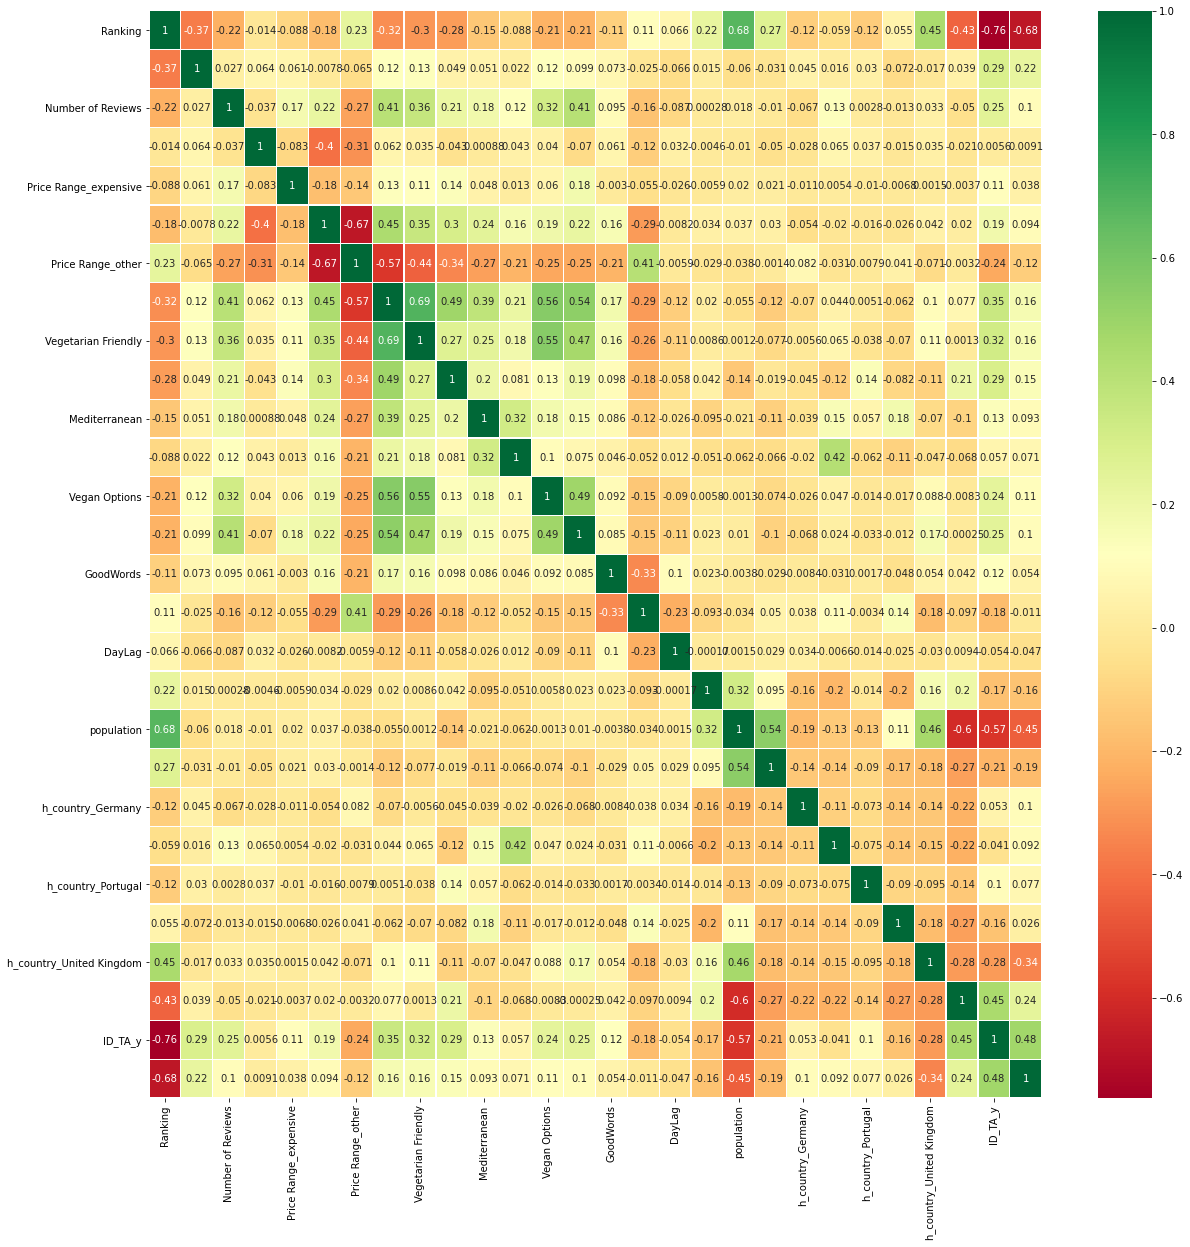

In [613]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(20,20)
plt.show()

Сильно коррелируют признаки 
ID_TA_y (количество ресторанов в сети) и Ranking
кухни вегетариан френдли и глютен фри тоже довольно сильно коррелируют



# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели

In [614]:
df.columns

Index(['Ranking', 'Rating', 'Number of Reviews', 'Price Range_cheap',
       'Price Range_expensive', 'Price Range_middle', 'Price Range_other',
       'Count_Cuisine', 'Vegetarian Friendly', 'European', 'Mediterranean',
       'Italian', 'Vegan Options', 'Gluten Free Options', 'GoodWords',
       'min_Review_date', 'DayLag', 'capital', 'population',
       'h_country_France', 'h_country_Germany', 'h_country_Italy',
       'h_country_Portugal', 'h_country_Spain', 'h_country_United Kingdom',
       'h_country_other', 'ID_TA_y', 'net'],
      dtype='object')

In [615]:
# Х - данные с информацией о ресторанах, у - целевая переменная (рейтинги ресторанов)

# ВАРИАНТ 1: без населения, без отзывов, без стран

X = df[['Ranking', 'Number of Reviews', 'Price Range_cheap',
       'Price Range_expensive', 'Price Range_middle', 'Price Range_other',
       'Count_Cuisine', 'Vegetarian Friendly', 'European', 'Mediterranean',
       'Italian', 'Vegan Options', 'Gluten Free Options', 'capital', 
       'ID_TA_y', 'net']]
y = df['Rating']

# МАИ = 0.3695

In [616]:
# ВАРИАНТ 2: добавила поля по отзывам

X = df[['Ranking', 'Number of Reviews', 'Price Range_cheap',
       'Price Range_expensive', 'Price Range_middle', 'Price Range_other',
       'Count_Cuisine', 'Vegetarian Friendly', 'European', 'Mediterranean',
       'Italian', 'Vegan Options', 'Gluten Free Options', 'capital', 
       'ID_TA_y', 'net', 'GoodWords',
       'min_Review_date', 'DayLag',]]
y = df['Rating']

# МАИ = 0.3443

In [617]:
# ВАРИАНТ 3: добавила разбивку по популярным странам

X = df[['Ranking', 'Number of Reviews', 'Price Range_cheap',
       'Price Range_expensive', 'Price Range_middle', 'Price Range_other',
       'Count_Cuisine', 'Vegetarian Friendly', 'European', 'Mediterranean',
       'Italian', 'Vegan Options', 'Gluten Free Options', 'capital', 
       'ID_TA_y', 'net', 'GoodWords',
       'min_Review_date', 'DayLag','h_country_France', 'h_country_Germany', 'h_country_Italy',
       'h_country_Portugal', 'h_country_Spain', 'h_country_United Kingdom',
       'h_country_other']]
y = df['Rating']

# МАИ = 0.2517

In [618]:
# ВАРИАНТ 3: добавила разбивку по популярным странам

X = df[['Ranking', 'Number of Reviews', 'Price Range_cheap',
       'Price Range_expensive', 'Price Range_middle', 'Price Range_other',
       'Count_Cuisine', 'Vegetarian Friendly', 'European', 'Mediterranean',
       'Italian', 'Vegan Options', 'Gluten Free Options', 'capital', 
       'ID_TA_y', 'net', 'GoodWords',
       'min_Review_date', 'DayLag','h_country_France', 'h_country_Germany', 'h_country_Italy',
       'h_country_Portugal', 'h_country_Spain', 'h_country_United Kingdom',
       'h_country_other']]
y = df['Rating']

# МАИ = 0.2517

In [619]:
# ВАРИАНТ 4: добавила признак "население городов"

X = df[['Ranking', 'Number of Reviews', 'Price Range_cheap',
       'Price Range_expensive', 'Price Range_middle', 'Price Range_other',
       'Count_Cuisine', 'Vegetarian Friendly', 'European', 'Mediterranean',
       'Italian', 'Vegan Options', 'Gluten Free Options', 'capital', 
       'ID_TA_y', 'net', 'GoodWords',
       'min_Review_date', 'DayLag','h_country_France', 'h_country_Germany', 'h_country_Italy',
       'h_country_Portugal', 'h_country_Spain', 'h_country_United Kingdom',
       'h_country_other', 'population']]
y = df['Rating']

# МАИ = 0.2123

In [620]:
# ВАРИАНТ 5: хочу попробовать убрать 'ID_TA_y'

X = df[['Ranking', 'Number of Reviews', 'Price Range_cheap',
       'Price Range_expensive', 'Price Range_middle', 'Price Range_other',
       'Count_Cuisine', 'Vegetarian Friendly', 'European', 'Mediterranean',
       'Italian', 'Vegan Options', 'Gluten Free Options', 'capital', 
       'net', 'GoodWords',
       'min_Review_date', 'DayLag','h_country_France', 'h_country_Germany', 'h_country_Italy',
       'h_country_Portugal', 'h_country_Spain', 'h_country_United Kingdom',
       'h_country_other', 'population']]
y = df['Rating']

# МАИ = 0.2142 - качество немножко ухудшилось


In [621]:
# оставляю лучший результат ВАРИАНТ 4

X = df[['Ranking', 'Number of Reviews', 'Price Range_cheap',
       'Price Range_expensive', 'Price Range_middle', 'Price Range_other',
       'Count_Cuisine', 'Vegetarian Friendly', 'European', 'Mediterranean',
       'Italian', 'Vegan Options', 'Gluten Free Options', 'capital', 
       'ID_TA_y', 'net', 'GoodWords',
       'min_Review_date', 'DayLag','h_country_France', 'h_country_Germany', 'h_country_Italy',
       'h_country_Portugal', 'h_country_Spain', 'h_country_United Kingdom',
       'h_country_other', 'population']]
y = df['Rating']

# МАИ = 0.2123

In [622]:
# Загружаем специальный инструмент для разбивки:
from sklearn.model_selection import train_test_split

In [623]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.
# Для тестирования мы будем использовать 25% от исходного датасета.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Создаём, обучаем и тестируем модель

In [624]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [ ]:
# Создаём модель
regr = RandomForestRegressor(n_estimators=100)

# Обучаем модель на тестовом наборе данных
regr.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = regr.predict(X_test)

In [ ]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

In [ ]:
Итоги: в данном ноутбуке представлена самая лучшая модель


Кроме этого рассматривала еще такие варианты:
    * без доп признаков, полученных из отзывов, без признака "население", 
      без популярных стран качество модели было 0.3695
    * к предыдущей версии добавлены поля "количество хороших слов", "прошло дней с момента последнего отзыва",
       "временной лаг между отзывами"- качество 0.3443
    * добавлена разбивка по популярным странам - качество 0.2517
    * добавлен признак "население городов" - качество 0.2123
    * убрала признак 'ID_TA_y' (количество ресторанов в сети), который сильно коррелировал с полем Ranking 
        - получила качество 0.2142
    

    
    